In [2]:
# a monty carlo simulation of the KLD
# 2019-03-20

import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal
import math


def norm_pdf_multivariate(x, mu, sigma):
    size = len(x)
    if size == len(mu) and (size, size) == sigma.shape:
        det = np.linalg.det(sigma)
        if det == 0:
            raise NameError("The covariance matrix can't be singular")

        norm_const = 1.0/ ( math.pow((2*np.pi),float(size)/2) * math.pow(det,1.0/2) )
        x_mu = np.matrix(x - mu)
        inv = np.linalg.inv(sigma)       
        result = math.pow(math.e, -0.5 * (x_mu * inv * x_mu.T))
        return norm_const * result
    else:
        raise NameError("The dimensions of the input don't match")

def mulitvarate_guassian(d, mean, covariance, n):
    A = np.linalg.cholesky(covariance)
    Z = np.random.normal(size=(d, n))
    v = np.dot(A,Z) 

    x = np.zeros((d,n)) 
    for i in range(n):
        x[:,i] = v[:,i] + mean
    return x




def N_mulitvarate_guassian(d, mean, mean2, n, prob, covariance,covariance2):

    if d != np.shape(covariance)[0] & d != np.shape(covariance)[1]:
        print('dimension error')
        return
    # Compute the Decomposition:
    A = np.linalg.cholesky(covariance)
    A2 = np.linalg.cholesky(covariance2)
  
    X = np.zeros((d,n))
    for i in range(n+1):
        #prob draw from first guassian
        if np.random.rand() < prob:
            Z = np.random.normal(size=(d, 1))
            #shape X
            v = np.dot(A,Z) + mean
           
            X[0:d,i-1:i]= v
            # # add the label
            # X[d,i-1:i] = 0

        else:
        #prob draw from second guassian
            Z = np.random.normal(size=(d, 1))
            v= np.dot(A2,Z) + mean2
            
            X[0:d,i-1:i]= v
            # # add the label
            # X[d,i-1:i] = 1

            
    return X

# parameters of simulation

n  = 1000 # Samples to draw
prob = 0.1 # prob of drawing from first guassian
N = 1 # number of monte carlo simulations

# parameters for first guassian
mean= np.array([[2.], [3.], [4.], [5.]]) 
covariance = np.matrix([[2.3, 0, 0, 0],
           [0, 1.5, 0, 0],
           [0, 0, 1.7, 0],
           [0, 0,   0, 2]])



# parameters for second guassian
mean2= np.array([[1.], [2.], [3.], [4.]]) 
covariance2 = np.matrix([[2.3, 0, 0, 0],
           [0, 1.5, 0, 0],
           [0, 0, 1.7, 0],
           [0, 0,   0, 2]])

# monte carlo simulation
KLD = np.zeros((N,1))

for i in range(N):
    # draw a discrete sample ai from the mixture model
    
    n=1
    ai = N_mulitvarate_guassian(4, mean, mean2, n, prob, covariance,covariance2)
    # compute pdf of ai 
    print('ai:',ai)
    est_mean = np.mean(ai[0:4,:],axis=1)
    est_cov = np.cov(ai[0:4,:])
    f_ai = norm_pdf_multivariate(ai[0:4,0], est_mean, est_cov)
    print('f_ai:',f_ai)
    #contious sample xi for f_ai
    xi = mulitvarate_guassian(4, est_mean, est_cov, n)    
    

    # draw a continuous sample x from the resulting gaussian component


print('KLD = ', np.mean(KLD))


ai: [[-2.86333093]
 [ 1.11203825]
 [ 0.87625594]
 [ 5.88652915]]
f_ai: nan
KLD =  0.0


C:\Users\dan\AppData\Local\Temp\ipykernel_11864\1666386649.py:106: RuntimeWarning: Degrees of freedom <= 0 for slice
  est_cov = np.cov(ai[0:4,:])
c:\Users\dan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\dan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\dan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\linalg\linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


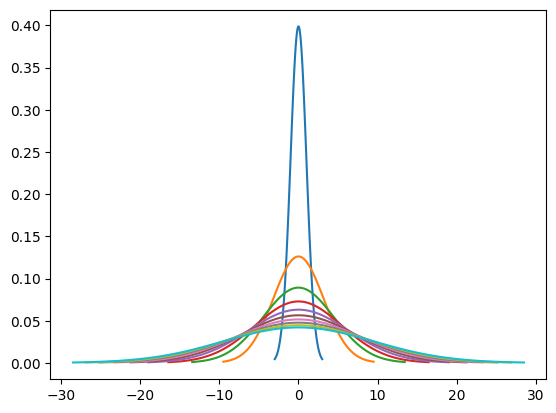

In [11]:

# normal distribution with changing mean and variance
# https://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib

# mean and variance
mu = 0
variance = [1,10, 20, 30, 40, 50, 60, 70, 80, 90, 100]	


# plot
for i in range(10):
    sigma = math.sqrt(variance[i])
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma))

plt.show()

